<a href="https://colab.research.google.com/github/Stephen-Raj-A/SDC-GENAI/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.9100 - loss: 0.2927 - val_accuracy: 0.9800 - val_loss: 0.0619
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9869 - loss: 0.0444 - val_accuracy: 0.9848 - val_loss: 0.0444
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9907 - loss: 0.0292 - val_accuracy: 0.9888 - val_loss: 0.0362
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9932 - loss: 0.0202 - val_accuracy: 0.9891 - val_loss: 0.0326
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9953 - loss: 0.0136 - val_accuracy: 0.9904 - val_loss: 0.0307
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9963 - loss: 0.0110 - val_accuracy: 0.9880 - val_loss: 0.0404
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9968 - loss: 0.0095 - val_accuracy: 0.9889 - val_loss: 0.0391
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9980 -

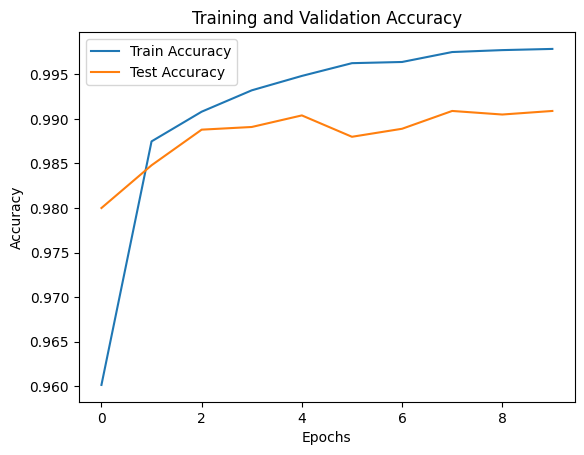

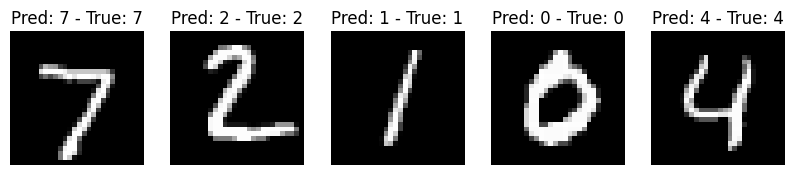

In [1]:
!pip install tensorflow scikit-learn matplotlib
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the MNIST dataset (28x28 grayscale images of digits 0-9)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data: Reshape to (28, 28, 1) and normalize the pixel values
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# One-hot encode the labels (digits 0-9)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the CNN model
model = Sequential()

# Add a convolutional layer with 32 filters, a kernel size of 3x3, and ReLU activation
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add a max-pooling layer to reduce the spatial dimensions
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer with 64 filters and ReLU activation
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Add another max-pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 2D feature maps into 1D
model.add(Flatten())

# Add a fully connected (dense) layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add an output layer with 10 units (one for each digit), using softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model using the Adam optimizer and categorical cross-entropy loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels
y_test_classes = np.argmax(y_test, axis=1)  # Convert true labels to class labels

# Print accuracy and classification report
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')

print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))

# Optionally, plot the training history (loss and accuracy)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Visualize a few predictions
num_samples = 5
plt.figure(figsize=(10, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred_classes[i]} - True: {y_test_classes[i]}")
    plt.axis('off')
plt.show()

